#### SparkSession and SparkContext:

In [1]:
## Create SparkSession:

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]") \
                    .appName('SparkByExamples.com') \
                    .getOrCreate()

your 131072x1 screen size is bogus. expect trouble


22/12/28 19:56:32 WARN Utils: Your hostname, Murilo-PC resolves to a loopback address: 127.0.1.1; using 172.21.223.92 instead (on interface eth0)
22/12/28 19:56:32 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/28 19:56:33 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
## Create SparkContext:	
sc = spark.sparkContext

#### RDD:

##### Benefits:

1. In-Memory Processing
PySpark loads the data from disk and process in memory and keeps the data in memory, this is the main difference between PySpark and Mapreduce (I/O intensive). In between the transformations, we can also cache/persists the RDD in memory to reuse the previous computations.

2. Immutability
PySpark RDD’s are immutable in nature meaning, once RDDs are created you cannot modify. When we apply transformations on RDD, PySpark creates a new RDD and maintains the RDD Lineage.

3. Fault Tolerance
PySpark operates on fault-tolerant data stores on HDFS, S3 e.t.c hence any RDD operation fails, it automatically reloads the data from other partitions. Also, When PySpark applications running on a cluster, PySpark task failures are automatically recovered for a certain number of times (as per the configuration) and finish the application seamlessly.

4. Lazy Evolution
PySpark does not evaluate the RDD transformations as they appear/encountered by Driver instead it keeps the all transformations as it encounters(DAG) and evaluates the all transformation when it sees the first RDD action.

5. Partitioning
When you create RDD from a data, It by default partitions the elements in a RDD. By default it partitions to the number of cores available.

##### Limitation:

1. No Input Optimization Engine
There are several spark advance optimizers like catalyst optimizer and tungsten execution engine. RDDs are not able to use these optimizers. There is no way in RDD for automatic optimization. To optimize, we can optimize each RDD manually.

2. Not Enough Memory
This is a sort of storage issue when we are unable to store RDD due to its lack of memory. The RDD degrades itself when there is not enough space to store spark RDD in-memory or on disk. All the partitions that are already overflowing from RAM can be later on stored in the disk. Even so, that will provide the same level of performance. To overcome this issue, we need to increase the size of RAM or Disk.

3. Runtime type safety
There is no run-time type safety in spark RDD spark RDD. Runtime type safety means it does not allow us to check error at the same time you are compiling the Program.

4. Handling Structured Data
Spark RDD are user specific, they don’t infer any schema of the ingested data like other APIs. Such as data frames as well as datasets. Moreover,  when we need data immediately, a method to get and import data is data ingestion process.

##### Create RDD:

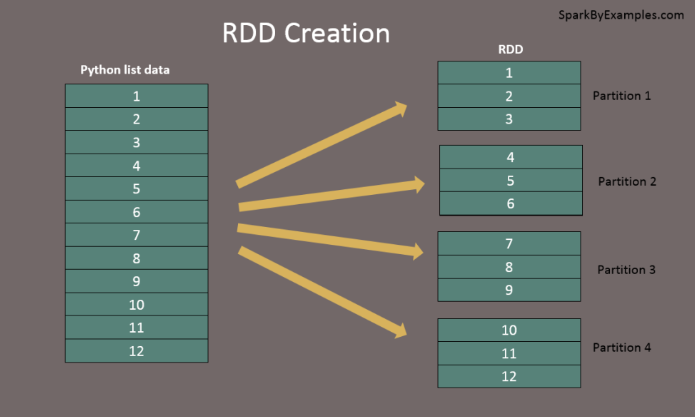

##### 1. From Collection: 

In [5]:
data = [1,2,3,4,5,6,7,8,9,10,11,12]
rdd=sc.parallelize(data)
print(rdd)
print(rdd.collect())

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:274


In [12]:
# With partition:
rdd2=sc.parallelize(data, 2)
print(rdd2)
print(rdd2.collect())
print("Initial partition count:"+str(rdd2.getNumPartitions()))

ParallelCollectionRDD[6] at readRDDFromFile at PythonRDD.scala:274
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
initial partition count:2


In [14]:
# With Repartition and Coalesce:
reparRdd = rdd.repartition(4)
print("re-partition count:"+str(reparRdd.getNumPartitions()))

reparRdd = rdd.coalesce(2)
print("re-partition count:"+str(reparRdd.getNumPartitions()))

re-partition count:4
re-partition count:1


##### 2. From External: 

In [ ]:
#Example:JSON		 
rddjsonfile = spark.read.json("/my_path/pyspark/part1.json").rdd
print(rddjsonfile)
print(rddjsonfile.collect())
print("Initial partition count:"+str(rddjsonfile.getNumPartitions()))

In [ ]:
#Example:csv		 
rddjsonfile = spark.read.csv("/my_path//pyspark/*.csv").rdd
print(rddjsonfile)
print(rddjsonfile.collect())
print("Initial partition count:"+str(rddjsonfile.getNumPartitions()))

##### 3. From Another RDD:

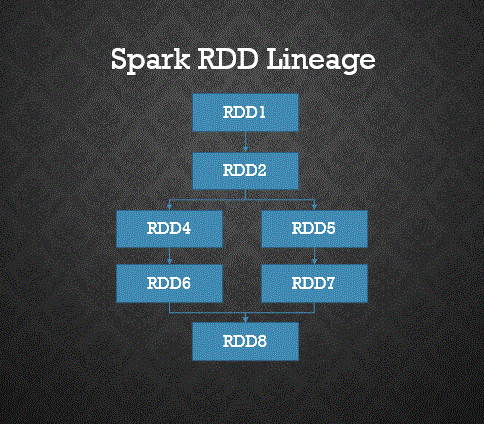

##### 4. From TextFile: 

In [3]:
rddfromtxt = sc.textFile("/my_path/textfile.txt") 
print(rddfromtxt)
print(rddfromtxt.collect())
print("Initial partition count:"+str(rddfromtxt.getNumPartitions())) 

/home/mubrandao/bigdata-study/pyspark/textfile.txt MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0
['Project Gutenberg’s', 'Alice’s Adventures in Wonderland', 'by Lewis Carroll', 'This eBook is for the use', 'of anyone anywhere', 'at no cost and with', 'Alice’s Adventures in Wonderland', 'by Lewis Carroll', 'This eBook is for the use', 'of anyone anywhere', 'at no cost and with', 'This eBook is for the use', 'of anyone anywhere', 'at no cost and with', 'Project Gutenberg’s', 'Alice’s Adventures in Wonderland', 'by Lewis Carroll', 'This eBook is for the use', 'of anyone anywhere', 'at no cost and with', 'Alice’s Adventures in Wonderland', 'by Lewis Carroll', 'This eBook is for the use', 'of anyone anywhere', 'at no cost and with', 'This eBook is for the use', 'of anyone anywhere', 'at no cost and with', 'Project Gutenberg’s', 'Alice’s Adventures in Wonderland', 'by Lewis Carroll', 'This eBook is for the use', 'of anyone anywhere', 'at no cost and with', 'Alice’s Adven

##### RDD Operations

1. RDD Transformations:

    Transformations on PySpark RDD returns another RDD and transformations are lazy meaning they don’t execute until you call an action on RDD. Some transformations on RDD’s are flatMap(), map(), reduceByKey(), filter(), sortByKey() and return new RDD instead of updating the current.

    RDD Transformation Types:

    * Narrow Transformation:

        Narrow transformations are the result of map() and filter() functions and these compute data that live on a single partition meaning there will not be any data movement between partitions to execute narrow transformations. Functions such as map(), mapPartition(), flatMap(), filter(), union() are some examples of narrow transformation

        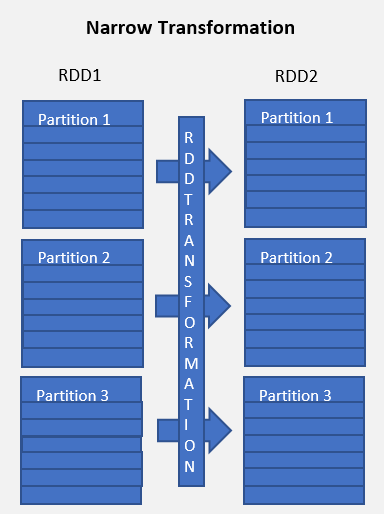

    * Wider Transformation:

        Wider transformations are the result of groupByKey() and reduceByKey() functions and these compute data that live on many partitions meaning there will be data movements between partitions to execute wider transformations. Since these shuffles the data, they also called shuffle transformations. Functions such as groupByKey(), aggregateByKey(), aggregate(), join(), repartition() are some examples of a wider transformations.

        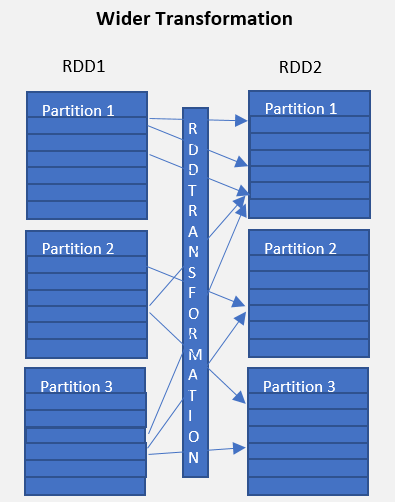

In [5]:
for element in rddfromtxt.collect():
    print(element)

#Flatmap    
rddfromtxt2=rddfromtxt.flatMap(lambda x: x.split(" "))
for element in rddfromtxt2.collect():
    print(element)

Project Gutenberg’s
Alice’s Adventures in Wonderland
by Lewis Carroll
This eBook is for the use
of anyone anywhere
at no cost and with
Alice’s Adventures in Wonderland
by Lewis Carroll
This eBook is for the use
of anyone anywhere
at no cost and with
This eBook is for the use
of anyone anywhere
at no cost and with
Project Gutenberg’s
Alice’s Adventures in Wonderland
by Lewis Carroll
This eBook is for the use
of anyone anywhere
at no cost and with
Alice’s Adventures in Wonderland
by Lewis Carroll
This eBook is for the use
of anyone anywhere
at no cost and with
This eBook is for the use
of anyone anywhere
at no cost and with
Project Gutenberg’s
Alice’s Adventures in Wonderland
by Lewis Carroll
This eBook is for the use
of anyone anywhere
at no cost and with
Alice’s Adventures in Wonderland
by Lewis Carroll
This eBook is for the use
of anyone anywhere
at no cost and with
This eBook is for the use
of anyone anywhere
at no cost and with
Project Gutenberg’s
Alice’s Adventures in Wonderland
by

In [6]:
#map
rddfromtxt3=rddfromtxt2.map(lambda x: (x,1))
for element in rddfromtxt3.collect():
    print(element)

('Project', 1)
('Gutenberg’s', 1)
('Alice’s', 1)
('Adventures', 1)
('in', 1)
('Wonderland', 1)
('by', 1)
('Lewis', 1)
('Carroll', 1)
('This', 1)
('eBook', 1)
('is', 1)
('for', 1)
('the', 1)
('use', 1)
('of', 1)
('anyone', 1)
('anywhere', 1)
('at', 1)
('no', 1)
('cost', 1)
('and', 1)
('with', 1)
('Alice’s', 1)
('Adventures', 1)
('in', 1)
('Wonderland', 1)
('by', 1)
('Lewis', 1)
('Carroll', 1)
('This', 1)
('eBook', 1)
('is', 1)
('for', 1)
('the', 1)
('use', 1)
('of', 1)
('anyone', 1)
('anywhere', 1)
('at', 1)
('no', 1)
('cost', 1)
('and', 1)
('with', 1)
('This', 1)
('eBook', 1)
('is', 1)
('for', 1)
('the', 1)
('use', 1)
('of', 1)
('anyone', 1)
('anywhere', 1)
('at', 1)
('no', 1)
('cost', 1)
('and', 1)
('with', 1)
('Project', 1)
('Gutenberg’s', 1)
('Alice’s', 1)
('Adventures', 1)
('in', 1)
('Wonderland', 1)
('by', 1)
('Lewis', 1)
('Carroll', 1)
('This', 1)
('eBook', 1)
('is', 1)
('for', 1)
('the', 1)
('use', 1)
('of', 1)
('anyone', 1)
('anywhere', 1)
('at', 1)
('no', 1)
('cost', 1)
('and'

In [7]:
#reduceByKey
rddfromtxt4=rddfromtxt3.reduceByKey(lambda a,b: a+b)
for element in rddfromtxt4.collect():
    print(element)

('Project', 9)
('Gutenberg’s', 9)
('Alice’s', 18)
('Adventures', 18)
('in', 18)
('Wonderland', 18)
('by', 18)
('Lewis', 18)
('Carroll', 18)
('This', 27)
('eBook', 27)
('is', 27)
('for', 27)
('the', 27)
('use', 27)
('of', 27)
('anyone', 27)
('anywhere', 27)
('at', 27)
('no', 27)
('cost', 27)
('and', 27)
('with', 27)


In [8]:
#map
rddfromtxt5 = rddfromtxt4.map(lambda x: (x[1],x[0])).sortByKey()
for element in rddfromtxt5.collect():
    print(element)

(9, 'Project')
(9, 'Gutenberg’s')
(18, 'Alice’s')
(18, 'Adventures')
(18, 'in')
(18, 'Wonderland')
(18, 'by')
(18, 'Lewis')
(18, 'Carroll')
(27, 'This')
(27, 'eBook')
(27, 'is')
(27, 'for')
(27, 'the')
(27, 'use')
(27, 'of')
(27, 'anyone')
(27, 'anywhere')
(27, 'at')
(27, 'no')
(27, 'cost')
(27, 'and')
(27, 'with')


In [9]:
#filter
rddfromtxt6 = rddfromtxt5.filter(lambda x : 'a' in x[1])
for element in rddfromtxt6.collect():
    print(element)

(18, 'Wonderland')
(18, 'Carroll')
(27, 'anyone')
(27, 'anywhere')
(27, 'at')
(27, 'and')


2. RDD Actions:

    RDD actions are PySpark operations that return the values to the driver program. Any function on RDD that returns other than RDD is considered as an action in PySpark programming. In this tutorial, I will explain the most used RDD actions with examples. Action functions trigger the transformations to execute. As mentioned in RDD Transformations, all transformations are lazy evaluation meaning they do not get executed right away, and action trigger them to execute

In [10]:
# Action - count
print("Count : "+str(rddfromtxt6.count()))

Count : 6


In [11]:
# Action - first
firstRec = rddfromtxt6.first()
print("First Record : "+str(firstRec[0]) + ","+ firstRec[1])


First Record : 18,Wonderland


In [12]:
# Action - max
datMax = rddfromtxt6.max()
print("Max Record : "+str(datMax[0]) + ","+ datMax[1])

Max Record : 27,at


In [13]:
# Action - reduce
totalWordCount = rddfromtxt6.reduce(lambda a,b: (a[0]+b[0],a[1]))
print("dataReduce Record : "+str(totalWordCount[0]))


dataReduce Record : 144


In [14]:
# Action - take
data3 = rddfromtxt6.take(3)
for f in data3:
    print("data3 Key:"+ str(f[0]) +", Value:"+f[1])

data3 Key:18, Value:Wonderland
data3 Key:18, Value:Carroll
data3 Key:27, Value:anyone
